In [1]:
import pandas as pd
import numpy as np
import re

In [2]:
df= pd.read_csv("dataset/data.csv")

In [3]:
df.head()

,Unique_ID,Category,Review_Header,Review_text,Rating,Own_Rating
0,136040,smartTv,Nice one,I liked it,5,Positive
1,134236,mobile,Huge battery life with amazing display,I bought the phone on Amazon and been using my...,5,Positive
2,113945,books,Four Stars,"Awesome book at reasonable price, must buy ......",4,Positive
3,168076,smartTv,Nice quality,good,5,Positive
4,157302,books,Nice book,"The book is fine,not bad,contains nice concept...",3,Neutral


In [4]:
df.shape

(60889, 6)

In [5]:
df.isna().sum()


Unique_ID         0
Category          0
Review_Header     3
Review_text      27
Rating            0
Own_Rating        0
dtype: int64

In [6]:
df=df.dropna()

In [7]:
df=df[["Review_Header", "Review_text", "Own_Rating"]]

In [8]:
df["Review"] = df["Review_Header"]+df["Review_text"]

In [9]:
df=df[["Review", "Own_Rating"]]

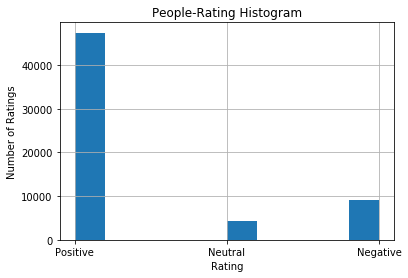

In [10]:
import matplotlib.pyplot as plt

# Sample data
ratings = df['Own_Rating']

# Create histogram
plt.hist(ratings)
plt.xlabel("Rating")
plt.ylabel("Number of Ratings")
plt.title("People-Rating Histogram")
plt.grid(True)
plt.show()


In [34]:
import re
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
corpus = []
y=[]
for i in range(0, len(df)):
    if i in df.index:
        y.append(df['Own_Rating'][i])
        review = re.sub('[^a-zA-Z]', ' ', df['Review'][i])
        review = review.lower()
        review = review.split()

        review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
        review = ' '.join(review)
        corpus.append(review)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [37]:
corpus


['nice onei like',
 'huge batteri life amaz displayi bought phone amazon use samsung coupl week deliveri experi amazon top notch best thing phone batteri life normal usag batteri work day lot game app usag still easili work day mah batteri life problem super amol display awesom camera notch top minimum give immers experi game watch video core cpu perform game heavi app extrem good back camera mp tripl rear camera mean snap photo normal ultra wide shot night mode also good front camera also good auto focu front camera optic imag stabilis miss camera camera great price rang price phone make great buy build qualiti similar samsung phone light weight sleek phone disadvantag found speaker phone stereo support speaker bottom low volum verdict given price rang batteri life great camera amaz display make phone great buy',
 'four starsawesom book reason price must buy',
 'nice qualitygood',
 'nice bookth book fine bad contain nice concept nice explain like concept',
 'nice tvnice tv pic qualiti

In [71]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=3000)
X = cv.fit_transform(corpus).toarray()
X.shape

(60833, 3000)

In [72]:
y

,sentiments
0,1
1,1
2,1
3,1
4,0
...,...
60828,1
60829,1
60830,1
60831,1


In [73]:
y = pd.DataFrame(y,columns=['sentiments'])
sentiment_mapping = {"Positive": 1, "Negative": -1, "Neutral": 0}


In [74]:

# Replace sentiment labels with numeric values
y['sentiments'].replace(sentiment_mapping, inplace=True)
y.shape

TypeError: Cannot compare types 'ndarray(dtype=int64)' and 'str'

In [75]:
#Creating a train test split
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)


In [77]:

model = MultinomialNB().fit(X_train,y_train)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [78]:
model.score(X_train,y_train)

0.8611350840422471

In [79]:
model.score(X_test,y_test)

0.8511547628832087

Confusion Matrix:
[[1285  160  425]
 [ 184  192  487]
 [ 281  274 8879]]


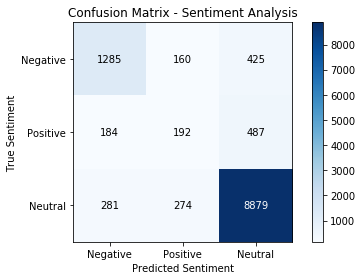

In [87]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import MultinomialNB

# Assuming you have the trained Naive Bayes model named 'nb_model' and the test data 'X_test' with corresponding true labels 'y_true'

# Apply the trained model to predict labels for the test data
y_pred = model.predict(X_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

# Visualize the confusion matrix as a heatmap
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Sentiment Analysis')
plt.colorbar()
classes = ['Negative', 'Positive','Neutral']  # Replace with your class labels if different
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)
plt.xlabel('Predicted Sentiment')
plt.ylabel('True Sentiment')

thresh = cm.max() / 2.0
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'), ha="center", va="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.show()
